In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 外部データの読み込み
data = np.loadtxt("test_data",delimiter=",")

In [3]:
# 実データをrベクトルに
r_x = data[:,0] # 列の取り出し
r_y = data[:,1]

In [4]:
# 平均を計算
ave_r_x = np.average(r_x)
ave_r_y = np.average(r_y)

# \begin{equation}
x = r - \bar{r} 
\end{equation}

In [5]:
# rベクトルをxベクトルに変換(原点を中心にする)
x_x = r_x - ave_r_x
x_y = r_y - ave_r_y

## \begin{equation}
\mathbf{V}_{xy} =  \begin{pmatrix}
\sum_{\alpha = 1}^{30} (x_{\alpha} - \bar{x})^2 /30 & \sum_{\alpha = 1}^{30} (x_{\alpha} - \bar{x})(y_{\alpha} - \bar{y}) /30 \\
\sum_{\alpha = 1}^{30} (y_{\alpha} - \bar{y})(x_{\alpha} - \bar{x}) /30  & \sum_{\alpha = 1}^{30} (y_{\alpha} - \bar{y})^2 /30 \\
\end{pmatrix}
\end{equation}

In [6]:
# 分散共分散行列を計算
V = np.zeros((2,2))
V[0][0] = np.dot(x_x, x_x.T) / 30 # ベクトルと転置したベクトルの内積でシグマ計算を実現
V[0][1] = np.dot(x_x, x_y.T) / 30
V[1][0] = np.dot(x_y, x_x.T) / 30
V[1][1] = np.dot(x_y, x_y.T) / 30

In [7]:
# 分散共分散行列の固有値,固有ベクトルを計算
la, u = np.linalg.eig(V)

In [8]:
print("ave_r_x:", ave_r_x)
print("ave_r_y:", ave_r_y)
print("V:", V)
print("la:", la)
print("u:", u)

ave_r_x: 158.31
ave_r_y: 59.1933333333
V: [[ 111.3429       41.41373333]
 [  41.41373333   91.25395556]]
la: [ 143.91284706   58.68400849]
u: [[ 0.78603624 -0.61818041]
 [ 0.61818041  0.78603624]]


In [9]:

# グラフに直線を書く準備
u1_x = np.arange(-30,30,1) # -30から30まで1刻みのデータを作成
u1_y = np.arange(-30,30,1)
u2_x = np.arange(-30,30,1)
u2_y = np.arange(-30,30,1)

# 固有ベクトル倍
u1_x = u1_x * u[0][0]
u1_y = u1_y * u[1][0]
u2_x = u2_x * u[0][1]
u2_y = u2_y * u[1][1]

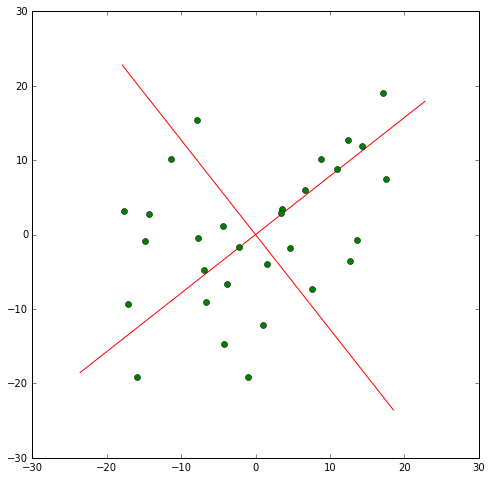

In [10]:
plt.figure(figsize=(8,8)) # グラフの縦横比を8inchで固定
# plt.plot(rx,ry,"bo") # 実データを青でプロット
plt.plot(u1_x,u1_y,"-r") # u1を赤でプロット
plt.plot(u2_x,u2_y,"-r") # u2を赤でプロット
plt.plot(x_x, x_y, "go") # 原点移動したデータを緑でプロット
plt.gca().set_aspect('equal', adjustable='box') # グラフの縦横比を1:1にする
plt.show()

In [11]:
# u1とu2が直交してないっぽく見えたから内積0になるかどうかで確認
u1 = u[:,0]
u2 = u[:,1]
print("np.dot(u1,u2):", np.dot(u1,u2))

np.dot(u1,u2): 0.0


## sklearnを使ってPCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, n_components=2, whiten=False)

In [13]:
print(pca.components_)

[[-0.78603624 -0.61818041]
 [ 0.61818041 -0.78603624]]


In [14]:
# グラフに直線を書く準備
u1_x = np.arange(-30,30,1) # -30から30まで1刻みのデータを作成
u1_y = np.arange(-30,30,1)
u2_x = np.arange(-30,30,1)
u2_y = np.arange(-30,30,1)

# 固有ベクトル倍
u1_x = u1_x * pca.components_[0][0]
u1_y = u1_y * pca.components_[1][0]
u2_x = u2_x * pca.components_[0][1]
u2_y = u2_y * pca.components_[1][1]

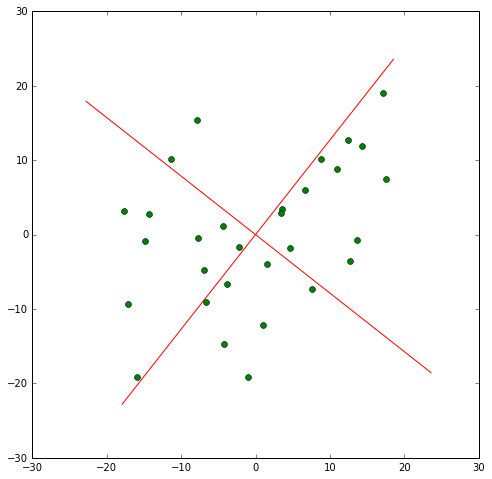

In [15]:
plt.figure(figsize=(8,8)) # グラフの縦横比を8inchで固定
# plt.plot(rx,ry,"bo") # 実データを青でプロット
plt.plot(u1_x,u1_y,"-r") # u1を赤でプロット
plt.plot(u2_x,u2_y,"-r") # u2を赤でプロット
plt.plot(x_x, x_y, "go") # 原点移動したデータを緑でプロット
plt.gca().set_aspect('equal', adjustable='box') # グラフの縦横比を1:1にする
plt.show()

In [16]:
# u1とu2が直交してないっぽく見えたから内積0になるかどうかで確認
u1 = pca.components_[:,0]
u2 = pca.components_[:,1]
print("np.dot(u1,u2):", np.dot(u1,u2))

np.dot(u1,u2): 0.0
